In [146]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)


In [147]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [148]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [149]:
#checking shape of the dataset
df.shape

(7043, 21)

In [150]:
df.nunique().sort_values(ascending=False)

customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
DeviceProtection       3
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
gender                 2
PhoneService           2
PaperlessBilling       2
Dependents             2
Partner                2
SeniorCitizen          2
Churn                  2
dtype: int64

Here we can see customer ID column is unique generated columns hence we will drop this column

# EDA

# Dropping unwanted column

In [151]:
df.drop('customerID',axis=1,inplace=True)

# Checking ISNULL Data

In [152]:
#cheking null values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

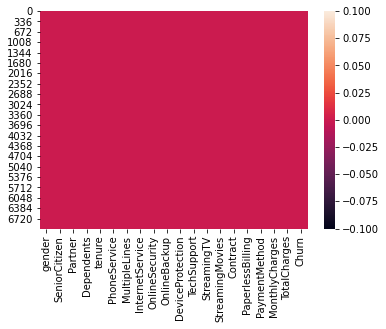

In [153]:

sns.heatmap(df.isnull())

as we can see the Null Data is not present

# Checking for Duplicate Rows

In [154]:
df.duplicated().sum()

22

In [155]:
df=df.drop_duplicates()

In [156]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Checking Datatype of the columns 

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


as we can see we have many object columns which needs to convert in numeric for better prediction

In [158]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [159]:
df['Churn'].value_counts()

No     5164
Yes    1857
Name: Churn, dtype: int64

we can see the Data unbalanced hence we will apply SMOTE technique later on to balance the Data

########################################################################################################################

# Checking Unique Data:

we can see some uniuqe data count so we can have some fair idea on insights of Data

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


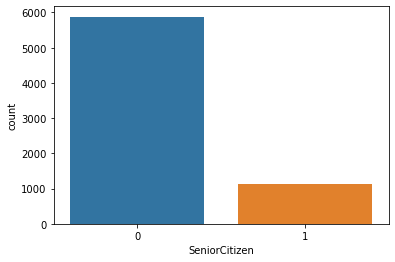

In [160]:
sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

The SeniorCitizen column contain younger customer=5880 and senior citizen=1142 data

No     5164
Yes    1857
Name: Churn, dtype: int64


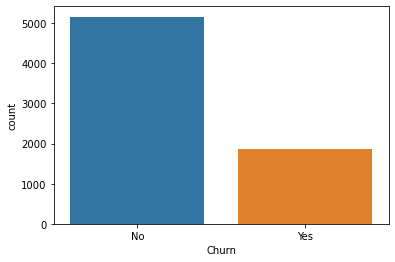

In [161]:
sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

The churn column contain 5164 no and 1857 yes datapoints

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


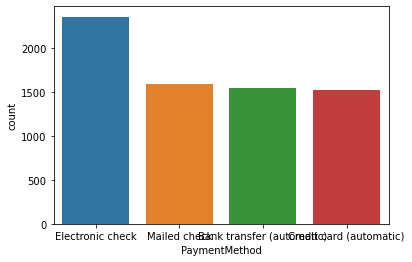

In [162]:
sns.countplot(x='PaymentMethod',data=df)
print(df['PaymentMethod'].value_counts())

The PaymentMethod column contain 2365 electronic check and 1596 mailed check 1544 bank tranfer  and rest Credit Car for 1522

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


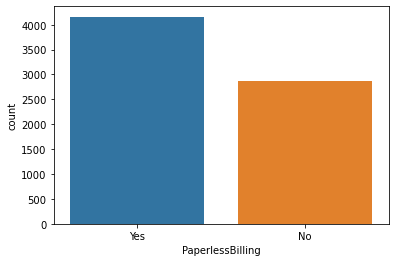

In [163]:
sns.countplot(x='PaperlessBilling',data=df)
print(df['PaperlessBilling'].value_counts())

The churn column contain 4161 yes and 2860 no datapoints

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


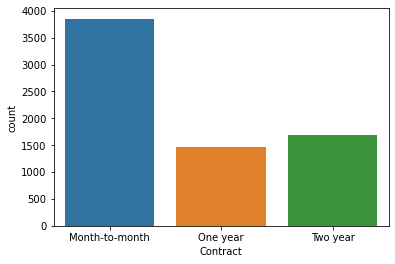

In [164]:
sns.countplot(x='Contract',data=df)
print(df['Contract'].value_counts())

The contract column contains Month-to-month    3853,Two year 1695,One year 1473

No                     2777
Yes                    2732
No internet service    1512
Name: StreamingMovies, dtype: int64


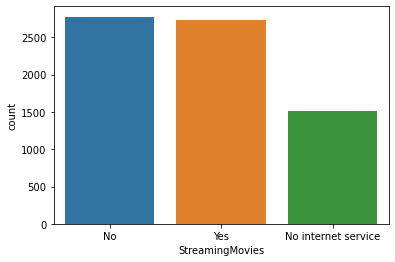

In [165]:
sns.countplot(x='StreamingMovies',data=df)
print(df['StreamingMovies'].value_counts())

The StreamingMovies column contains No  2777,Yes 2732,No internet service 1512

No                     2802
Yes                    2707
No internet service    1512
Name: StreamingTV, dtype: int64


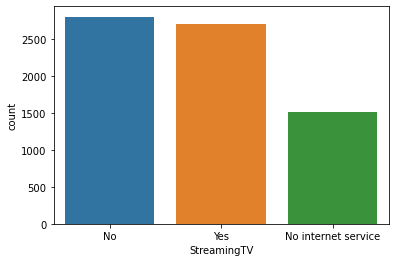

In [166]:
sns.countplot(x='StreamingTV',data=df)
print(df['StreamingTV'].value_counts())

The StreamingTV column contains No 2802,Yes  2707,No internet service 1512

No                     3465
Yes                    2044
No internet service    1512
Name: TechSupport, dtype: int64


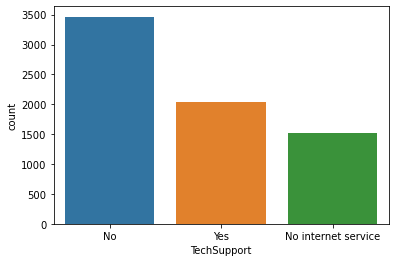

In [167]:
sns.countplot(x='TechSupport',data=df)
print(df['TechSupport'].value_counts())

No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64


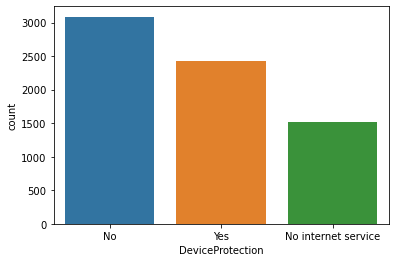

In [168]:
sns.countplot(x='DeviceProtection',data=df)
print(df['DeviceProtection'].value_counts())

No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64


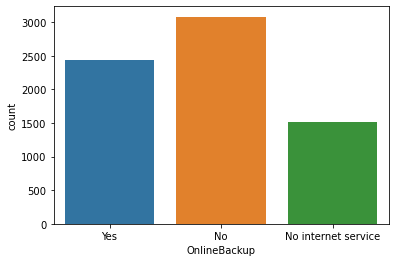

In [169]:
sns.countplot(x='OnlineBackup',data=df)
print(df['OnlineBackup'].value_counts())

No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64


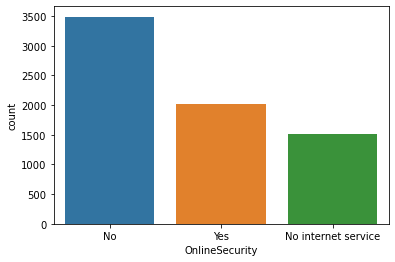

In [170]:
sns.countplot(x='OnlineSecurity',data=df)
print(df['OnlineSecurity'].value_counts())

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


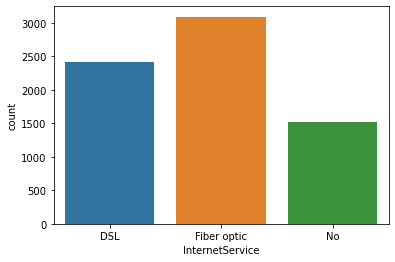

In [171]:
sns.countplot(x='InternetService',data=df)
print(df['InternetService'].value_counts())

No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


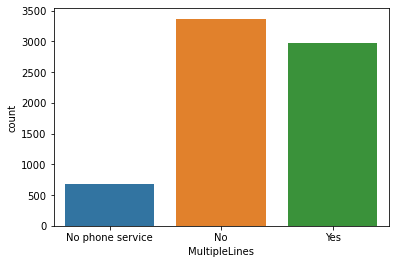

In [172]:
sns.countplot(x='MultipleLines',data=df)
print(df['MultipleLines'].value_counts())

Yes    6339
No      682
Name: PhoneService, dtype: int64


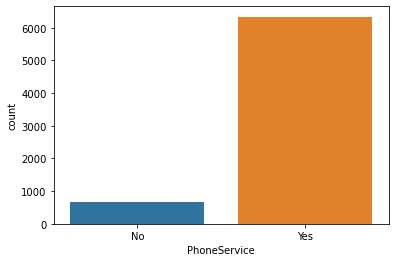

In [173]:
sns.countplot(x='PhoneService',data=df)
print(df['PhoneService'].value_counts())

1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


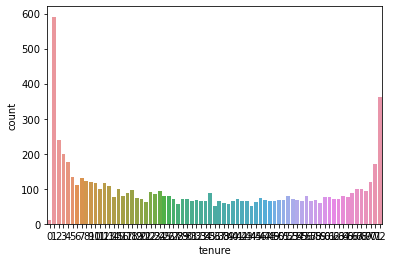

In [174]:
sns.countplot(x='tenure',data=df)
print(df['tenure'].value_counts())

No     4911
Yes    2110
Name: Dependents, dtype: int64


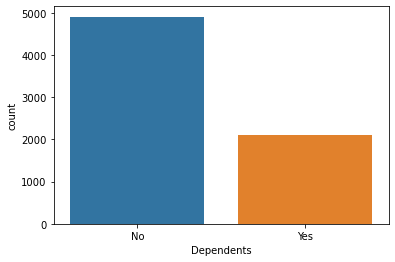

In [175]:
sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

No     3619
Yes    3402
Name: Partner, dtype: int64


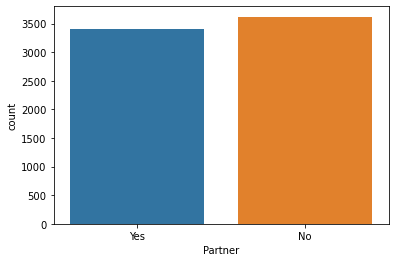

In [176]:
sns.countplot(x='Partner',data=df)
print(df['Partner'].value_counts())

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


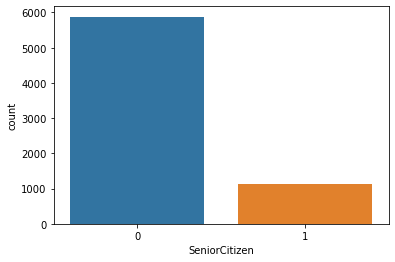

In [177]:
sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

Male      3541
Female    3480
Name: gender, dtype: int64


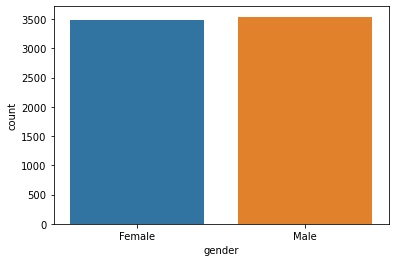

In [178]:
sns.countplot(x='gender',data=df)
print(df['gender'].value_counts())

0    5880
1    1141
Name: SeniorCitizen, dtype: int64


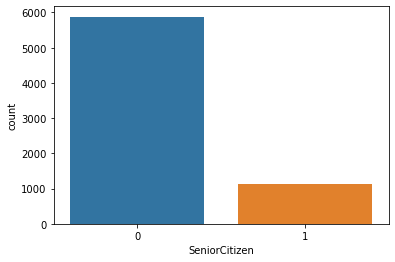

In [179]:
sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

# Checking and Converting Object Data in Numeric

In [180]:
df.dtypes.sort_values(ascending=False)

gender               object
OnlineBackup         object
TotalCharges         object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
DeviceProtection     object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
Churn                object
MonthlyCharges      float64
SeniorCitizen         int64
tenure                int64
dtype: object

In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))


In [183]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.5,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.4,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.9,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [184]:
df.dtypes.sort_values(ascending=False)

TotalCharges         object
MonthlyCharges      float64
tenure                int64
SeniorCitizen         int64
gender                int32
TechSupport           int32
PaymentMethod         int32
PaperlessBilling      int32
Contract              int32
StreamingMovies       int32
StreamingTV           int32
DeviceProtection      int32
OnlineBackup          int32
OnlineSecurity        int32
InternetService       int32
MultipleLines         int32
PhoneService          int32
Dependents            int32
Partner               int32
Churn                 int32
dtype: object

# Cleaning Data

we can see Total CHarges is Object columns which ideally should be numeric hence we will analyse and will convert into Nueric

In [185]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [187]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,,0


we can see we have some blank values hence the column is in object state.

will remove blank values and will convert into numeric

In [193]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [194]:
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [195]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [196]:
df.dtypes.sort_values(ascending=False)

TotalCharges        float64
MonthlyCharges      float64
tenure                int64
SeniorCitizen         int64
gender                int32
TechSupport           int32
PaymentMethod         int32
PaperlessBilling      int32
Contract              int32
StreamingMovies       int32
StreamingTV           int32
DeviceProtection      int32
OnlineBackup          int32
OnlineSecurity        int32
InternetService       int32
MultipleLines         int32
PhoneService          int32
Dependents            int32
Partner               int32
Churn                 int32
dtype: object

Now as we replace blank values with NAN values. we need to replace NAN values with mean data

In [198]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [199]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [200]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [201]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Describe Data

In [202]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.943455,0.870816,0.790486,0.907278,0.905284,0.797607,0.986469,0.993591,0.692636,0.592651,1.570716,64.851894,2290.353388,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.948575,0.737076,0.860730,0.880999,0.880787,0.862432,0.885762,0.885842,0.834163,0.491376,1.067530,30.069001,2265.044136,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,411.150000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1410.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3801.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Observation : 
    
    1. Here we can see std dev is more than +-1 in some columns hence we can say skewness and outliers are present
    2. Comparison in Mean and 50% : we can see mean value is greater than 50% means skewness are present.
    3. Comparison in 75% and Max : we can see the diff is high within 75% and ma value hence we can say that outliers are present.
    


# Checking Correlation:

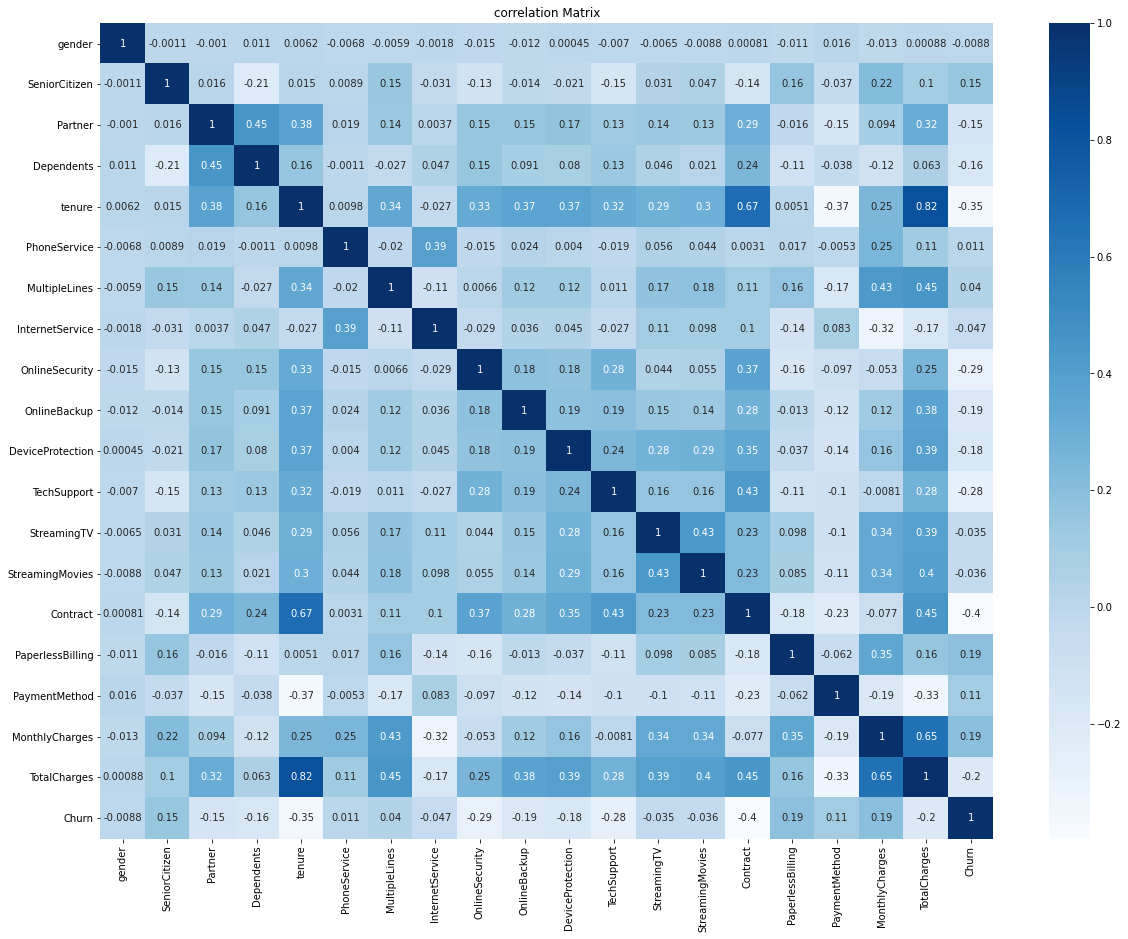

In [203]:
corr_mat=df.corr()

plt.figure(figsize=[20,15])#
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")
plt.show()

In [205]:
corr_mat['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.198306
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

Observation:

we can see Monthly charges are pisitively corelated with Churn where contract is negatively corelated with churn prediction.


# Checking Outliers

In [208]:
df.shape

(7021, 20)

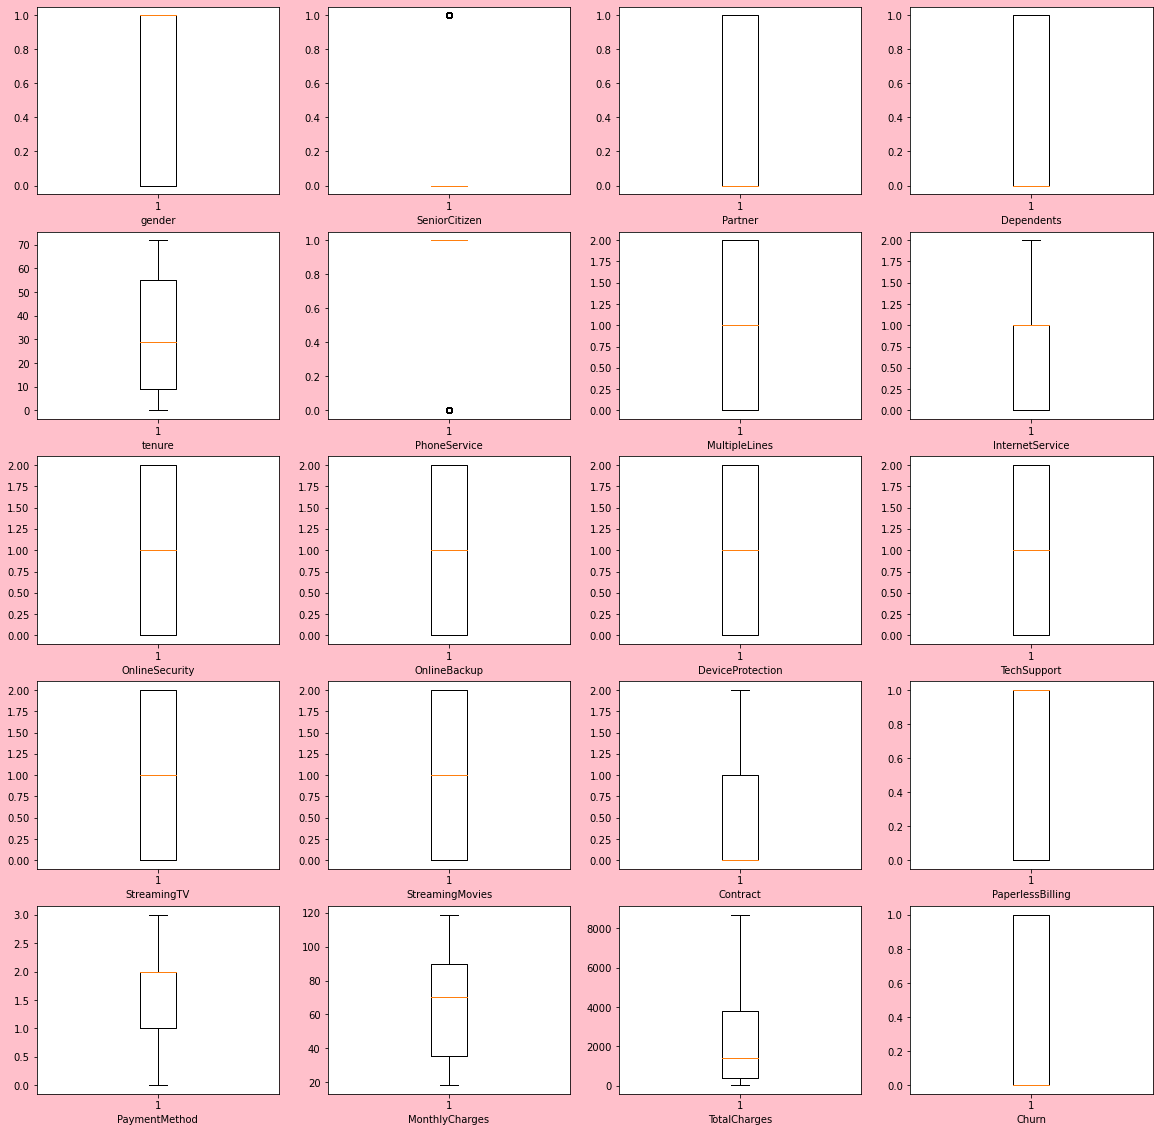

In [209]:
#checking one more time
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

some of the columns are having Outliers hence we will use Z score method to remove outliers

<AxesSubplot:>

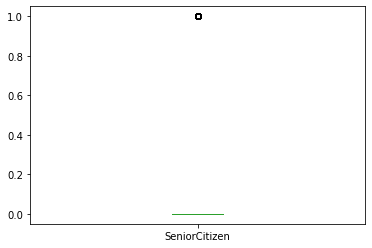

In [210]:
df['SeniorCitizen'].plot.box()

since the column is nominal type , wecannot consider its datapoints as outliers

<AxesSubplot:>

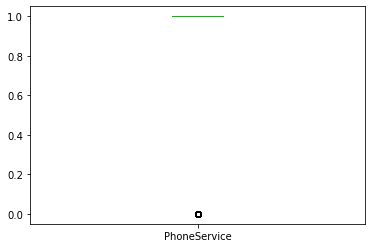

In [211]:
df['PhoneService'].plot.box()

In [212]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Removing outliers : Z score method

In [213]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.00872629, 0.44050836, 1.03140002, ..., 1.16413536, 0.99806637,
        0.59967071],
       [0.9913492 , 0.44050836, 0.96955592, ..., 0.26281076, 0.17698637,
        0.59967071],
       [0.9913492 , 0.44050836, 0.96955592, ..., 0.36591432, 0.96349505,
        1.66758187],
       ...,
       [1.00872629, 0.44050836, 1.03140002, ..., 1.17245016, 0.85827989,
        0.59967071],
       [0.9913492 , 2.27010445, 1.03140002, ..., 0.31756245, 0.87587462,
        1.66758187],
       [0.9913492 , 0.44050836, 0.96955592, ..., 1.35691277, 2.01076478,
        0.59967071]])

In [214]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  972, 1010, 1017, 1036, 1049, 1050, 1052,
       1071, 1109, 1118, 1121, 1143, 1145, 1149, 1160, 1168, 1181, 1203,
       1220, 1224, 1241, 1254, 1256, 1270, 1277, 1297, 1310, 1325, 1330,
       1332, 1333, 1338, 1347, 1350, 1363, 1377, 1400, 1405, 1414, 1450,
       1477, 1478, 1479, 1497, 1503, 1510, 1516, 1557, 1559, 1578, 1581,
       1611, 1617, 1631, 1634, 1649, 1686, 1689, 1

In [215]:
df_new=df[(z<3).all(axis=1)]
df_new

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [217]:
df_new.shape

(6339, 20)

Checking outliers again

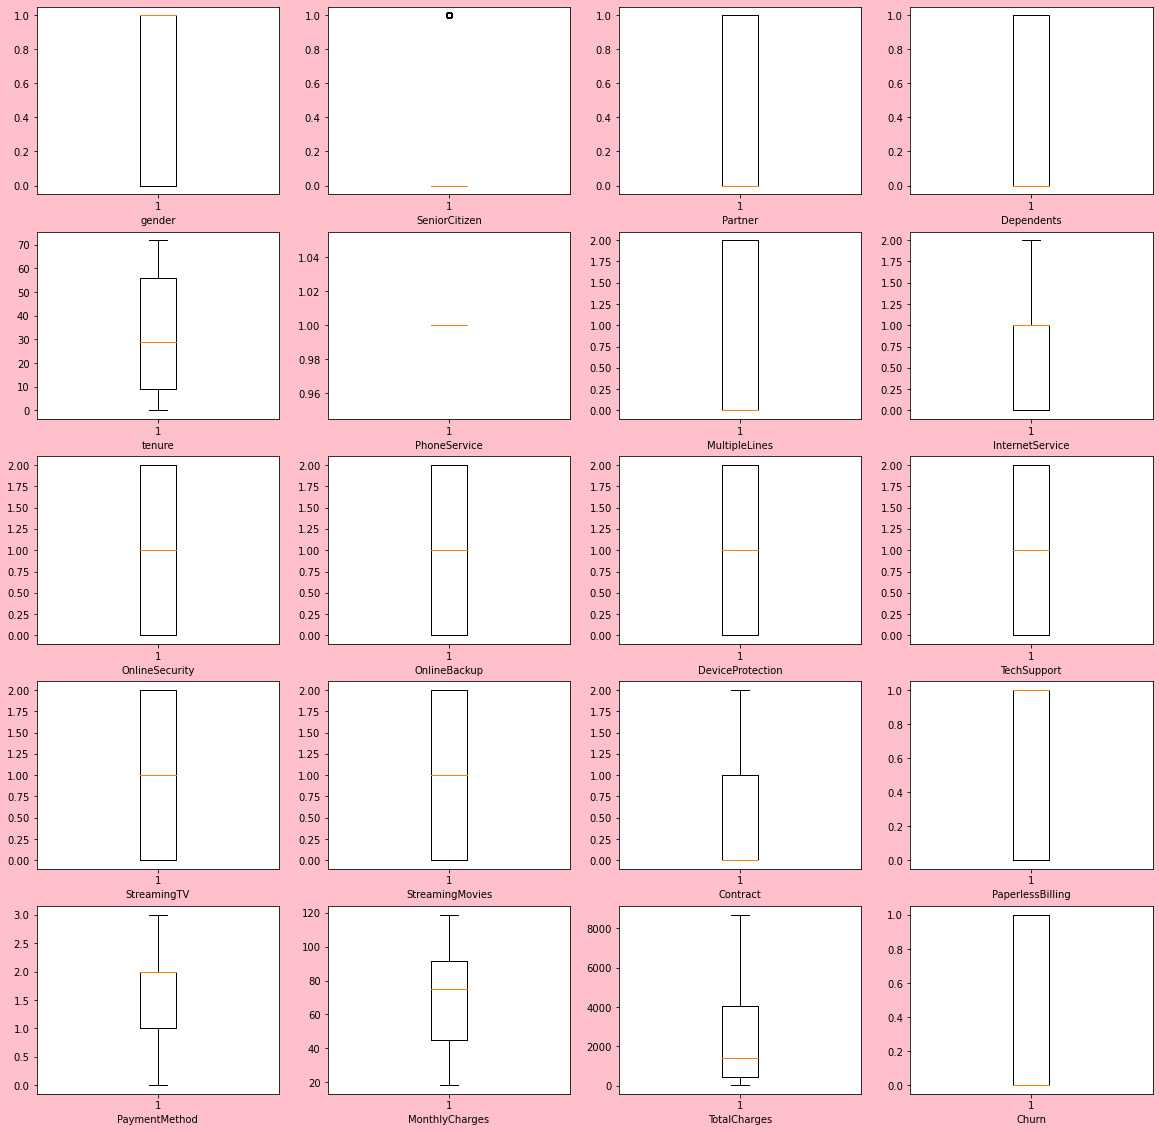

In [244]:
#checking one more time
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        plt.boxplot(df_new[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

we should not use Z score method twice to prevent Data loss hence will proceed further

# Splitting Data for training and TEsting

In [289]:
X=df_new.drop('Churn',axis=1)
y=df_new.Churn

# Checking skewness

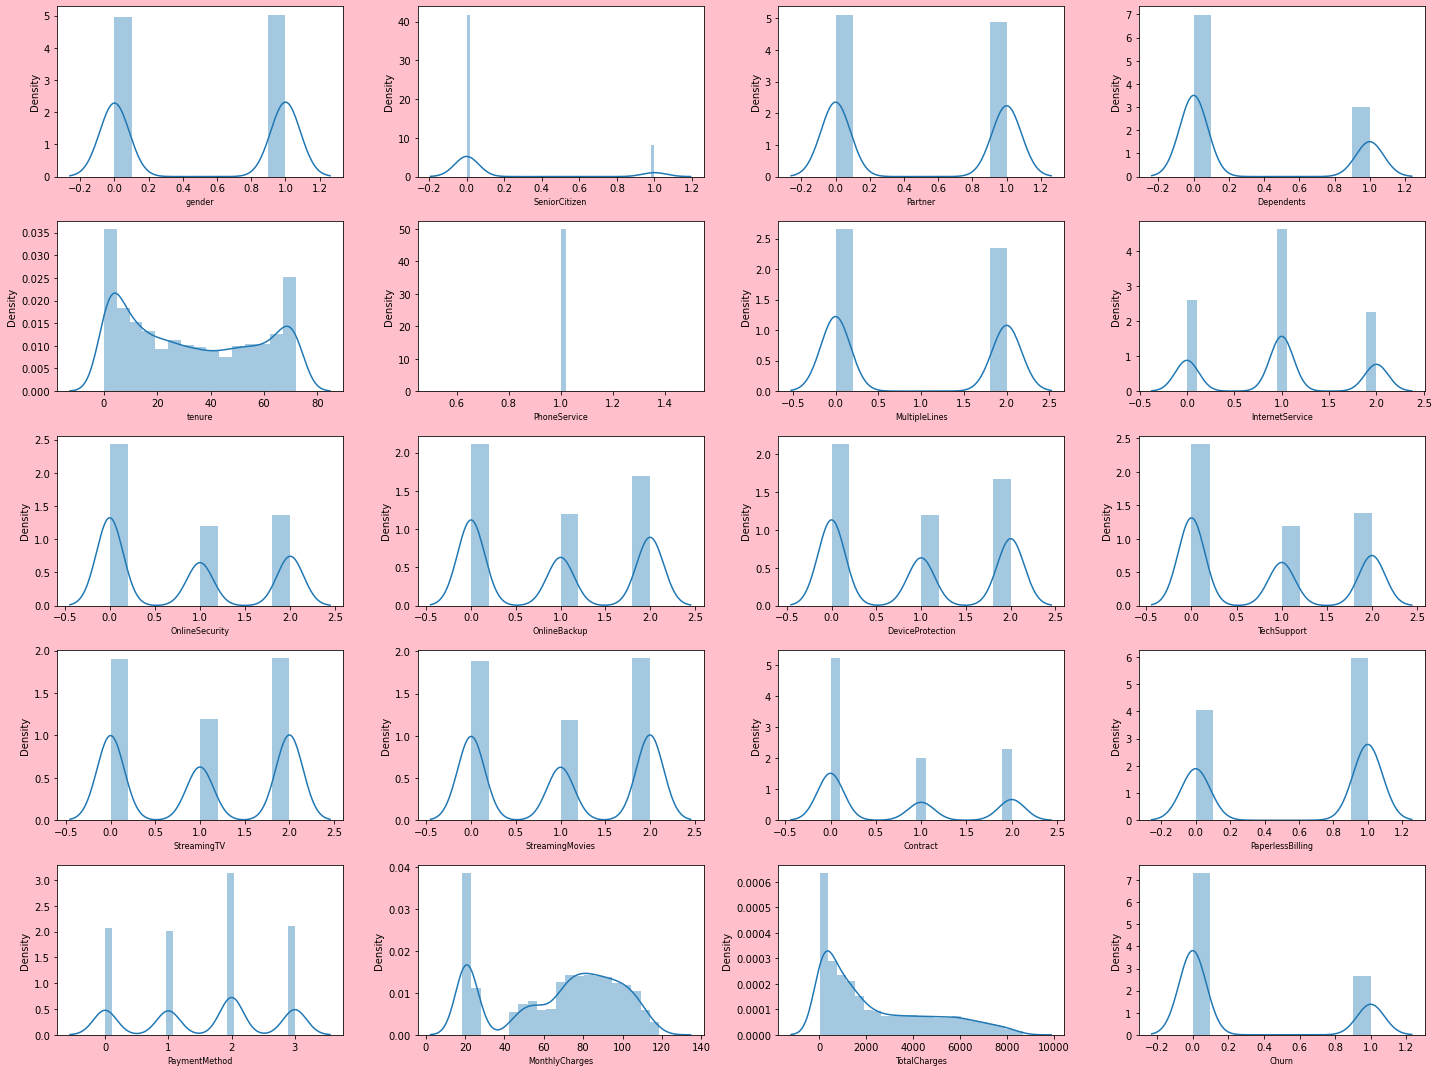

In [251]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()


In [290]:
#checking skewness in each columns
X.skew().sort_values(ascending=False)

SeniorCitizen       1.819335
TotalCharges        0.895850
Dependents          0.871194
Contract            0.624212
OnlineSecurity      0.421216
TechSupport         0.408970
tenure              0.233517
DeviceProtection    0.181524
OnlineBackup        0.166121
MultipleLines       0.125532
InternetService     0.051965
Partner             0.049562
PhoneService        0.000000
StreamingTV        -0.005185
StreamingMovies    -0.012505
gender             -0.012939
PaymentMethod      -0.165613
PaperlessBilling   -0.388673
MonthlyCharges     -0.404120
dtype: float64

we can many columns data is not normally distributed and having more than +-0.5 skewness range  hence we will use Power Transform query to remove skewness

# Remove Skewness: Power Transform

In [291]:
from sklearn.preprocessing import power_transform

In [292]:
x_new=power_transform(X)

In [293]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

1     1.819335
3     0.871194
14    0.297069
8     0.131837
6     0.125532
11    0.124153
2     0.049562
5     0.000000
0    -0.012939
10   -0.014799
9    -0.023950
7    -0.108296
12   -0.123535
13   -0.127701
18   -0.147794
16   -0.206523
4    -0.243866
17   -0.332914
15   -0.388673
dtype: float64

In [294]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

SeniorCitizen       1.819335
Dependents          0.871194
Contract            0.297069
OnlineSecurity      0.131837
MultipleLines       0.125532
TechSupport         0.124153
Partner             0.049562
PhoneService        0.000000
gender             -0.012939
DeviceProtection   -0.014799
OnlineBackup       -0.023950
InternetService    -0.108296
StreamingTV        -0.123535
StreamingMovies    -0.127701
TotalCharges       -0.147794
PaymentMethod      -0.206523
tenure             -0.243866
MonthlyCharges     -0.332914
PaperlessBilling   -0.388673
dtype: float64

In [295]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [296]:
sk=x1.skew().sort_values(ascending=False)

In [297]:
sk[np.abs(sk)>0.5]

SeniorCitizen    1.819335
Dependents       0.871194
dtype: float64

In [298]:
x1.isnull().sum().sum()

0

we can see we have two columns on which skenwss is not got removed hence we will use square root method to remove skewness

# Square root method 

In [299]:
import numpy as np
x1['SeniorCitizen']=np.sqrt(x1['SeniorCitizen'])


In [300]:
import numpy as np
x1['Dependents']=np.sqrt(x1['Dependents'])

In [301]:
x1.skew().sort_values(ascending=False)

Contract            0.297069
OnlineSecurity      0.131837
MultipleLines       0.125532
TechSupport         0.124153
Partner             0.049562
Dependents          0.000000
PhoneService        0.000000
SeniorCitizen       0.000000
gender             -0.012939
DeviceProtection   -0.014799
OnlineBackup       -0.023950
InternetService    -0.108296
StreamingTV        -0.123535
StreamingMovies    -0.127701
TotalCharges       -0.147794
PaymentMethod      -0.206523
tenure             -0.243866
MonthlyCharges     -0.332914
PaperlessBilling   -0.388673
dtype: float64

In [302]:
x1.isnull().sum()

gender                 0
SeniorCitizen       5302
Partner                0
Dependents          4435
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
dtype: int64

Observation: we can see after applying Squrt root method we got NAN Data hence we will replace NAN values

In [303]:
x1['SeniorCitizen']=x1['SeniorCitizen'].fillna(x1['SeniorCitizen'].mean())
x1['Dependents']=x1['Dependents'].fillna(x1['Dependents'].mean())

In [304]:
x1.skew().sort_values(ascending=False)

Contract            0.297069
OnlineSecurity      0.131837
MultipleLines       0.125532
TechSupport         0.124153
Partner             0.049562
Dependents          0.000000
PhoneService        0.000000
SeniorCitizen       0.000000
gender             -0.012939
DeviceProtection   -0.014799
OnlineBackup       -0.023950
InternetService    -0.108296
StreamingTV        -0.123535
StreamingMovies    -0.127701
TotalCharges       -0.147794
PaymentMethod      -0.206523
tenure             -0.243866
MonthlyCharges     -0.332914
PaperlessBilling   -0.388673
dtype: float64

In [305]:
x1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Now Skewness has removed

# checking VIF score

if VIF score is greater than 5 then we can drop that column

In [306]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
18,TotalCharges,39.441850
4,tenure,28.047101
17,MonthlyCharges,8.810478
14,Contract,2.416023
7,InternetService,1.619438
13,StreamingMovies,1.444624
12,StreamingTV,1.441722
6,MultipleLines,1.406008
11,TechSupport,1.395319
2,Partner,1.350392


In [309]:
x1.drop(columns='TotalCharges',axis=1,inplace=True)

In [310]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
4,tenure,2.604930
17,MonthlyCharges,2.418965
14,Contract,2.362456
7,InternetService,1.464769
13,StreamingMovies,1.444125
12,StreamingTV,1.440509
6,MultipleLines,1.404389
11,TechSupport,1.391177
2,Partner,1.351318
8,OnlineSecurity,1.333919


In [311]:
print(x1.shape)
print(y.shape)

(6339, 18)
(6339,)


# Checking Balance Unbalance Data

In [312]:
y.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

Here we can see the Data is unbalanced hence we need to use SMOTE technique to balance the data so model can predict well if both output is having similar Data for prediction

# SMOTE technique

In [313]:
from imblearn.over_sampling  import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x1,y)

In [314]:
trainy.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

In [315]:
X1=trainx
y=trainy

In [316]:
y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

Data is balanced Now

# Model Prediction for Churn column

we can see the churn column is having classifier Data hence we will use classification model

# Random Forest Classifier

In [317]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
#dt=DecisionTreeClassifier()
#lr=LogisticRegression()
rf=RandomForestClassifier()
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



In [318]:

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8421052631578947 Random state 0.1
accuracy 0.8525390625 Random state 0.11
accuracy 0.855863921217547 Random state 0.12
accuracy 0.8677685950413223 Random state 0.13
Best accuracy is 86.77685950413223 on Random state 0.13


In [322]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(50,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.13,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8429752066115702 Random state 50
accuracy 0.8586776859504133 Random state 51
accuracy 0.8702479338842976 Random state 53
accuracy 0.871900826446281 Random state 57
Best accuracy is 87.19008264462809 on Random state 57


In [323]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.13,random_state=57) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.8694214876033057
[[516  78]
 [ 80 536]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       594
           1       0.87      0.87      0.87       616

    accuracy                           0.87      1210
   macro avg       0.87      0.87      0.87      1210
weighted avg       0.87      0.87      0.87      1210



# Logistic Regression

In [324]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7755102040816326 Random state 0.1
accuracy 0.7815577439570277 Random state 0.12
accuracy 0.7915472779369628 Random state 0.15
accuracy 0.7924781732706514 Random state 0.16
accuracy 0.7941571524513096 Random state 0.32
Best accuracy is 79.41571524513095 on Random state 0.32


In [325]:
#finding the best random state
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.32,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7763599731363331 Random state 1
accuracy 0.7766957689724647 Random state 3
accuracy 0.7770315648085964 Random state 7
accuracy 0.777367360644728 Random state 11
accuracy 0.7793821356615178 Random state 13
accuracy 0.7807253190060444 Random state 16
accuracy 0.7871054398925453 Random state 19
accuracy 0.7907991940899933 Random state 24
accuracy 0.792813969106783 Random state 30
accuracy 0.7931497649429147 Random state 45
accuracy 0.7948287441235729 Random state 68
accuracy 0.7958361316319678 Random state 337
Best accuracy is 79.58361316319677 on Random state 337


In [326]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.32,random_state=337)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 79.58361316319677
[[115500  31500]
 [ 29300 121500]]


# SVC

In [327]:
#finding the best test_SIZE
from sklearn.svm import SVC
sv=SVC()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7937701396348013 Random state 0.1
accuracy 0.8310546875 Random state 0.11
Best accuracy is 83.10546875 on Random state 0.11


In [ ]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(50,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

In [330]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=53) # taking random as it is running slow
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 82.2265625
[[39200  9800]
 [ 8400 45000]]


# KNN

In [331]:
#finding the best test_size
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8045112781954887 Random state 0.1
accuracy 0.8048343777976723 Random state 0.12
Best accuracy is 80.48343777976723 on Random state 0.12


In [333]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(50,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.12,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7851387645478961 Random state 50
accuracy 0.8066248880931065 Random state 51
accuracy 0.8146821844225605 Random state 52
accuracy 0.8164726947179947 Random state 53
accuracy 0.8173679498657117 Random state 85
Best accuracy is 81.73679498657117 on Random state 85


In [334]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.12,random_state=85)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 81.73679498657117
[[39100 14200]
 [ 6200 52200]]


as we can see all models givng better accuracy we will do cross validation to find out accurate score

# CROSS Validation

In [335]:
from sklearn.model_selection import cross_val_score

In [337]:
#random forest classifier
scr=cross_val_score(rf,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.8474903653371697


In [338]:
#logistic regression
scr=cross_val_score(lr,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7796656324210015


In [339]:
#SVC
scr=cross_val_score(sv,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.798690668099588


In [340]:
#KNC 
scr=cross_val_score(knc,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7934234109306477


as we can see Random Forest Classifier is giving highest accuracy around 81.55% hence we will continue with the same model for hyper parameter Grid search technique to get best parameter for prediction

# Using hyperparameter tunning

In [341]:
from sklearn.model_selection import GridSearchCV
dt1=RandomForestClassifier()
params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }


grd=GridSearchCV(dt1,param_grid=params,cv=5,scoring='accuracy') # taking cv=5 as in for loop it is taking time

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

dt1=grd.best_estimator_

dt1.fit(x_train,y_train)

y_pred=dt1.predict(x_test)

dt_conf_mat=confusion_matrix(y_test,y_pred)

print(dt_conf_mat)

print(accuracy_score(y_test,y_pred))
    



best_params: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2'}
[[462  71]
 [ 73 511]]
0.8710832587287377


# Random Forest Algorithm with best parameter selection

In [342]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.13,random_state=57)
Output1=RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'log2')
Output1.fit(x_train,y_train)
pred2=Output1.predict(x_test)
acc2=Output1.score(x_test,y_test)
ytest2=y_test
ypred=pred2

#print('Accuracy Score',knc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
#print(classification_report(y_test,pred2))

print(pred2)
print(y_test)

0.8702479338842976
[[503  91]
 [ 66 550]]
[0 1 0 ... 0 0 1]
6047    0
5163    0
5547    0
2369    0
3661    0
       ..
412     1
5951    1
2820    0
1460    0
9246    1
Name: Churn, Length: 1210, dtype: int32


This is the final model with best Paraeter whcih is giving 87% accuracy

# AUC ROC

In [343]:
y_pred=sv.predict(x_test)

In [344]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [345]:
fpr,tpr,thresholds

(array([0.        , 0.83766234, 1.        ]),
 array([0.        , 0.18350168, 1.        ]),
 array([2, 1, 0]))

In [346]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.83766234 1.        ]
True positive rate [0.         0.18350168 1.        ]


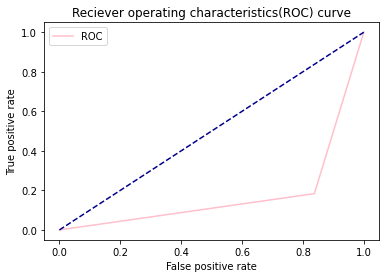

In [347]:
plt.plot(fpr,tpr,color='pink',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

In [348]:
# AUC score

In [349]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

82.7080327080327


# Classification Report

In [351]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       594
           1       0.83      0.84      0.83       616

    accuracy                           0.83      1210
   macro avg       0.83      0.83      0.83      1210
weighted avg       0.83      0.83      0.83      1210



# Saving the model in pickel format

In [353]:
import joblib
joblib.dump(classification_report(y_test,y_pred)*100,"Cust_Churn.pk1")

['Cust_Churn.pk1']

# Testing Model with Future Data for Output columns

In [367]:
x1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.993553,1.503714,-0.975532,1.235397,0.287886,1.421085e-14,-0.939216,-1.397017,1.272563,-1.104065,1.174879,-0.997098,-1.186060,-1.189672,0.783678,-1.212990,1.322376,-0.378873
1,0.993553,1.503714,-0.975532,1.235397,-1.505086,1.421085e-14,-0.939216,-1.397017,1.272563,1.168653,-1.096947,-0.997098,-1.186060,-1.189672,-0.891259,0.824409,1.322376,-0.480337
2,-1.006489,1.503714,-0.975532,1.235397,-1.505086,1.421085e-14,-0.939216,0.105982,-0.992009,-1.104065,-1.096947,-0.997098,-1.186060,-1.189672,-0.891259,0.824409,0.415785,0.079660
3,-1.006489,1.503714,-0.975532,1.235397,-0.938160,1.421085e-14,1.064718,0.105982,-0.992009,-1.104065,1.174879,-0.997098,1.100366,1.097496,-0.891259,0.824409,0.415785,1.082795
4,0.993553,1.503714,-0.975532,1.235397,-0.173878,1.421085e-14,1.064718,0.105982,-0.992009,1.168653,-1.096947,-0.997098,1.100366,-1.189672,-0.891259,0.824409,-0.515467,0.711978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,-1.006489,1.503714,-0.975532,1.235397,1.340093,1.421085e-14,-0.939216,1.388317,0.566886,0.305001,0.321102,0.554569,0.123933,0.116124,1.341709,0.824409,-1.486056,-1.492784
6335,0.993553,1.503714,1.025082,1.235397,-0.088994,1.421085e-14,1.064718,-1.397017,1.272563,-1.104065,1.174879,1.267565,1.100366,1.097496,0.783678,0.824409,1.322376,0.562486
6336,-1.006489,1.503714,1.025082,1.235397,1.340093,1.421085e-14,1.064718,0.105982,-0.992009,1.168653,1.174879,-0.997098,1.100366,1.097496,0.783678,0.824409,-0.515467,1.208794
6337,0.993553,1.503714,1.025082,1.235397,-1.276037,1.421085e-14,1.064718,0.105982,-0.992009,-1.104065,-1.096947,-0.997098,-1.186060,-1.189672,-0.891259,0.824409,1.322376,0.205208


In [366]:
y.iloc[0]

0

In [324]:
y.iloc[1]

108.15

In [358]:
t=np.array([0.993553,1.503714,-0.975532,1.235397,0.287886,1.421085e-14,-0.939216,-1.397017,1.272563,-1.104065,1.174879,-0.997098,-1.186060,-1.189672,0.783678,-1.212990,1.322376,-0.378873])

In [359]:
t.shape

(18,)

In [360]:
x_train.shape

(8094, 18)

In [361]:
t=t.reshape(1,-1)
t.shape

(1, 18)

In [362]:
Output1.predict(t)

array([0])

as we can see the actual and predicted output is same hence we can say that the model is predicting well